In [1]:
import pandas as pd

reference_dataset = pd.read_csv('/Path/DATASET_TESTCASES.csv')

print("Original Data:")
print(reference_dataset.head())

cleaned_reference_dataset = reference_dataset.dropna(subset=['Testcases'])

print("Cleaned Data:")
print(cleaned_reference_dataset.head())

Original Data:
                                     Scenarios Input  \
0              User Registration and Authentication:   
1                                                NaN   
2  Verify that users can register with valid info...   
3                                                NaN   
4                                                NaN   

                                           Testcases  
0                                                NaN  
1                                                NaN  
2  Verify that users can register with valid info...  
3                                                NaN  
4  Test Case 1: Enter all required fields (e.g., ...  
Cleaned Data:
                                     Scenarios Input  \
2  Verify that users can register with valid info...   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7  Verify that users can

In [2]:
LLaMA_df = pd.read_csv('/Path/LLaMA2_generated_test_cases.csv')
GPT_df = pd.read_csv('/Path/GPT_generated_test_cases.csv')


LLaMA: Number of Conceptually Similar Test Cases = 1000
GPT: Number of Conceptually Similar Test Cases = 885


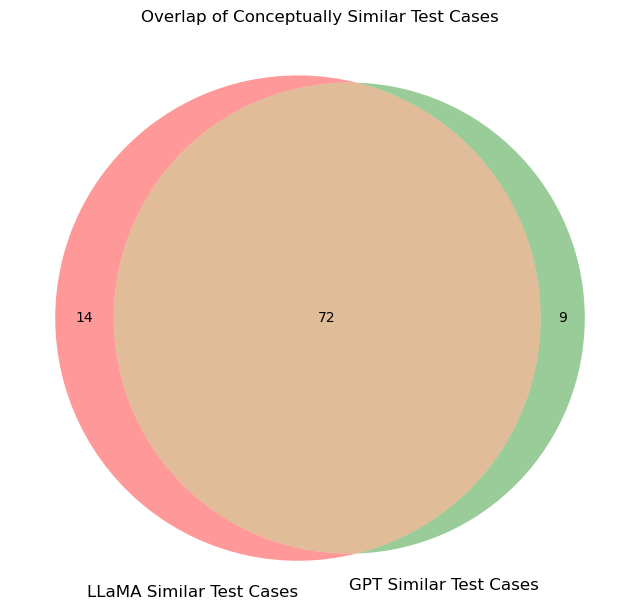

In [60]:
from sentence_transformers import SentenceTransformer, util
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
model = SentenceTransformer('all-MiniLM-L6-v2')

reference_embeddings = model.encode(cleaned_reference_dataset['Testcases'].dropna().tolist(), convert_to_tensor=True)
generated_embeddings_LLaMA = model.encode(LLaMA_df['Testcases'].dropna().tolist(), convert_to_tensor=True)
generated_embeddings_GPT = model.encode(GPT_df['Testcases'].dropna().tolist(), convert_to_tensor=True)

cosine_similarities_LLaMA = util.cos_sim(generated_embeddings_LLaMA, reference_embeddings)
cosine_similarities_GPT = util.cos_sim(generated_embeddings_GPT, reference_embeddings)

similar_indices_LLaMA = cosine_similarities_LLaMA >= 0.5
similar_indices_GPT = cosine_similarities_GPT >= 0.5

conceptual_similarity_count_LLaMA = similar_indices_LLaMA.sum()
conceptual_similarity_count_GPT = similar_indices_GPT.sum()


print(f"LLaMA: Number of Conceptually Similar Test Cases = {conceptual_similarity_count_LLaMA}")
print(f"GPT: Number of Conceptually Similar Test Cases = {conceptual_similarity_count_GPT}")

LLaMA_indices = similar_indices_LLaMA.nonzero(as_tuple=True)[0].tolist()
GPT_indices = similar_indices_GPT.nonzero(as_tuple=True)[0].tolist()

set_LLaMA = set(LLaMA_indices)
set_GPT = set(GPT_indices)

plt.figure(figsize=(8, 8))
venn2([set_LLaMA, set_GPT], ('LLaMA Similar Test Cases', 'GPT Similar Test Cases'))
plt.title("Overlap of Conceptually Similar Test Cases")
plt.show()


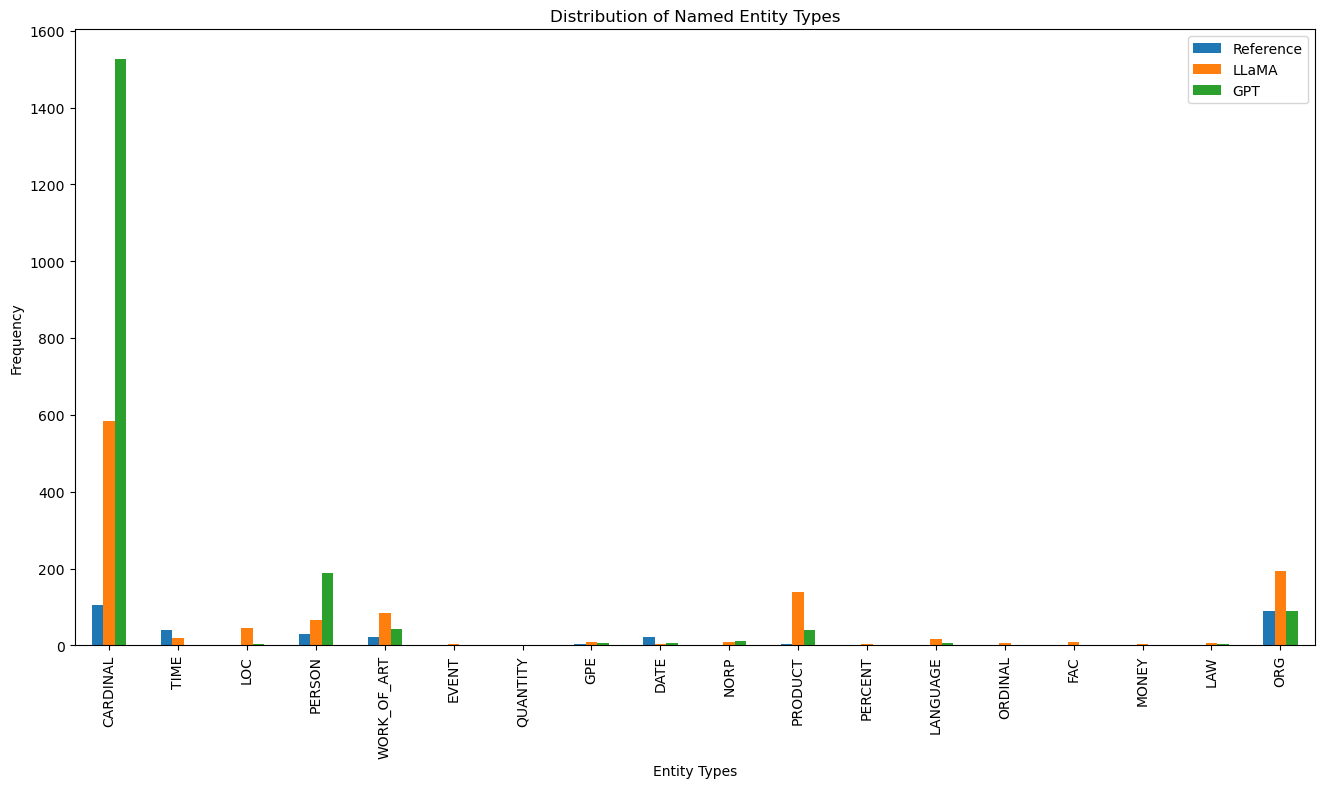

In [76]:
import spacy
import pandas as pd
import matplotlib.pyplot as plot


Eng_Model = spacy.load('en_core_web_sm')



# Function to extract entities
def extract_entities(datasetcolumn):
    entity_counts = {}
    for doc in Eng_Model.pipe(datasetcolumn.dropna()):
        for ent in doc.ents:
            entity_counts[ent.label_] = entity_counts.get(ent.label_, 0) + 1
    return entity_counts


Cleaned_Reference_entities = extract_entities(cleaned_reference_dataset['Testcases'])
LLaMA2_entities = extract_entities(LLaMA_df['Testcases'])
GPT_entities = extract_entities(GPT_df['Testcases'])


entity_types = list(set(ref_entities.keys()).union(llama_entities.keys(), gpt_entities.keys()))
entity_data = {
    'Reference': [Cleaned_Reference_entities.get(entity, 0) for entity in entity_types],
    'LLaMA': [LLaMA2_entities.get(entity, 0) for entity in entity_types],
    'GPT': [GPT_entities.get(entity, 0) for entity in entity_types]
}

dataframe = pd.DataFrame(entity_data, index=entity_types)


dataframe.plot(kind='bar', figsize=(16, 8), title='Distribution of Named Entity Types')
plot.xlabel('Entity Types')
plot.ylabel('Frequency')
plot.show()


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fazelehdehghani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fazelehdehghani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


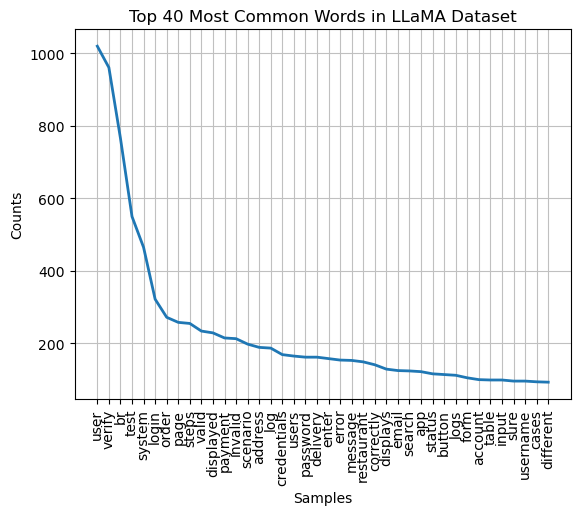

<Axes: title={'center': 'Top 40 Most Common Words in LLaMA Dataset'}, xlabel='Samples', ylabel='Counts'>

In [80]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Ensure that NLTK resources are downloaded (do this once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv('/Users/fazelehdehghani/Desktop/LLaMA2_generated_test_cases.csv')

# Combine all test cases into one large string
all_text = ' '.join(df['Testcases'].dropna())

# Tokenize the text
tokens_LLaMA = word_tokenize(all_text)

# Convert to lowercase
tokens_LLaMA = [token.lower() for token in tokens_LLaMA if token.isalpha()]  # isalpha helps remove punctuation

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens_LLaMA = [token for token in tokens_LLaMA if token not in stop_words]

# Frequency distribution
freq_dist = FreqDist(tokens_LLaMA)

# Plot the most common words
freq_dist.plot(40, title='Top 40 Most Common Words in LLaMA Dataset')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fazelehdehghani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fazelehdehghani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


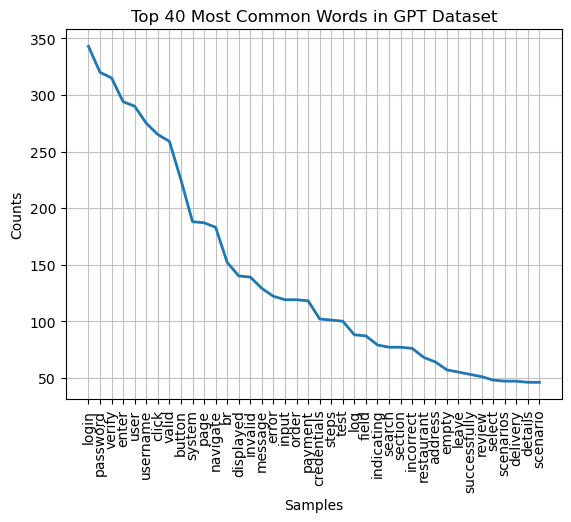

<Axes: title={'center': 'Top 40 Most Common Words in GPT Dataset'}, xlabel='Samples', ylabel='Counts'>

In [79]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Ensure that NLTK resources are downloaded (do this once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv('/Users/fazelehdehghani/Desktop/GPT_generated_test_cases.csv')

# Combine all test cases into one large string
all_text = ' '.join(df['Testcases'].dropna())

# Tokenize the text
tokens_GPT = word_tokenize(all_text)

# Convert to lowercase
tokens_GPT = [token.lower() for token in tokens_GPT if token.isalpha()]  # isalpha helps remove punctuation

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens_GPT = [token for token in tokens_GPT if token not in stop_words]

# Frequency distribution
freq_dist = FreqDist(tokens_GPT)

# Plot the most common words
freq_dist.plot(40, title='Top 40 Most Common Words in GPT Dataset')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fazelehdehghani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fazelehdehghani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


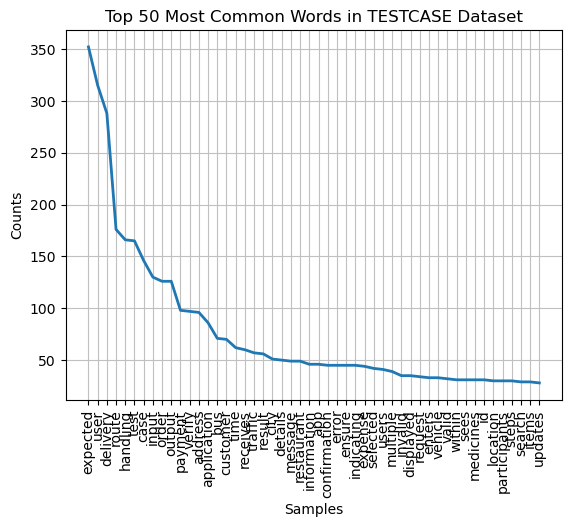

<Axes: title={'center': 'Top 50 Most Common Words in TESTCASE Dataset'}, xlabel='Samples', ylabel='Counts'>

In [64]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Ensure that NLTK resources are downloaded (do this once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv('/Users/fazelehdehghani/Desktop/DATASET_TESTCASES.csv')

# Combine all test cases into one large string
all_text = ' '.join(df['Testcases'].dropna())

# Tokenize the text
tokens_reference = word_tokenize(all_text)

# Convert to lowercase
tokens_reference = [token.lower() for token in tokens_reference if token.isalpha()]  # isalpha helps remove punctuation

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens_reference = [token for token in tokens_reference if token not in stop_words]

# Frequency distribution
freq_dist = FreqDist(tokens_reference)

# Plot the most common words
freq_dist.plot(40, title='Top 40 Most Common Words in TESTCASE Dataset')


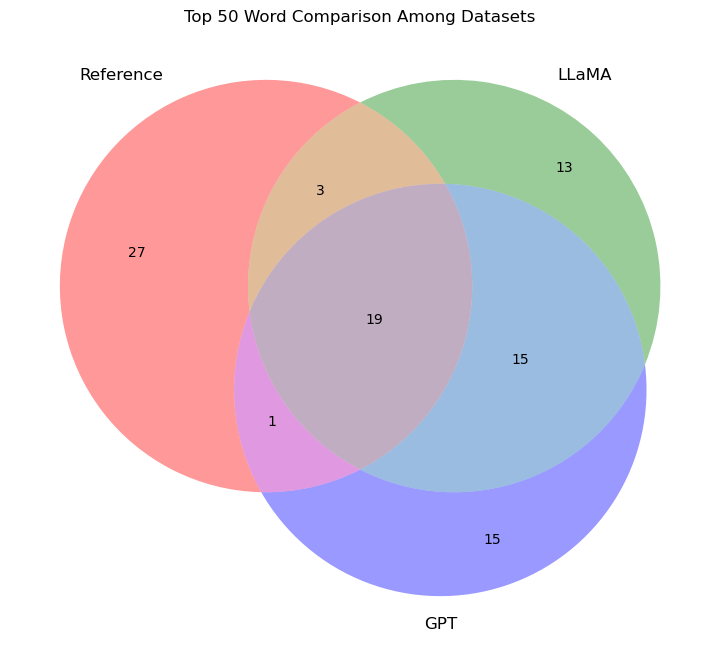

Unique Words in LLaMA Dataset: {'displays', 'login', 'log', 'form', 'able', 'successfully', 'table', 'results', 'credentials', 'enter', 'sure', 'logs', 'email', 'password', 'scenario', 'different', 'username', 'button', 'page', 'system', 'correctly', 'cases', 'specific', 'scenarioinput', 'status', 'br', 'attempt', 'account'}
Unique Words in GPT Dataset: {'displays', 'login', 'item', 'log', 'successfully', 'select', 'credentials', 'enter', 'new', 'scenarios', 'email', 'field', 'password', 'scenario', 'empty', 'username', 'incorrect', 'button', 'leave', 'method', 'page', 'section', 'system', 'fields', 'click', 'review', 'navigate', 'br', 'account', 'attempts'}


In [65]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Assuming 'tokens_reference', 'tokens_LLaMA', and 'tokens_GPT' are your tokenized lists from each dataset
freq_dist_reference = FreqDist(tokens_reference)
freq_dist_LLaMA = FreqDist(tokens_LLaMA)
freq_dist_GPT = FreqDist(tokens_GPT)

# Get top 50 words
top50_reference = {word for word, count in freq_dist_reference.most_common(50)}
top50_LLaMA = {word for word, count in freq_dist_LLaMA.most_common(50)}
top50_GPT = {word for word, count in freq_dist_GPT.most_common(50)}

# Calculate unique and common words
unique_LLaMA = top50_LLaMA.difference(top50_reference)
unique_GPT = top50_GPT.difference(top50_reference)
common_words = top50_reference.intersection(top50_LLaMA, top50_GPT)

# Plotting
plt.figure(figsize=(10, 8))
venn_diagram = venn3([top50_reference, top50_LLaMA, top50_GPT], ('Reference', 'LLaMA', 'GPT'))
plt.title('Top 50 Word Comparison Among Datasets')
plt.show()

# Print unique words for review
print("Unique Words in LLaMA Dataset:", unique_LLaMA)
print("Unique Words in GPT Dataset:", unique_GPT)


In [66]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# Load a pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Resetting indices (if you have previously filtered or modified the dataframes)
cleaned_reference_dataset = cleaned_reference_dataset.reset_index(drop=True)
LLaMA_df = LLaMA_df.reset_index(drop=True)
GPT_df = GPT_df.reset_index(drop=True)

# Assuming the DataFrame columns are converted to lists to avoid indexing issues
embeddings_ref = model.encode(cleaned_reference_dataset['Testcases'].tolist(), convert_to_tensor=True)
embeddings_LLaMA = model.encode(LLaMA_df['Testcases'].tolist(), convert_to_tensor=True)
embeddings_GPT = model.encode(GPT_df['Testcases'].tolist(), convert_to_tensor=True)

# Calculate cosine similarities
similarity_matrix_LLaMA = util.cos_sim(embeddings_LLaMA, embeddings_ref)
similarity_matrix_GPT = util.cos_sim(embeddings_GPT, embeddings_ref)

# Move tensors to CPU if they are on a GPU
if similarity_matrix_LLaMA.is_cuda or 'mps' in str(similarity_matrix_LLaMA.device):
    similarity_matrix_LLaMA = similarity_matrix_LLaMA.cpu()
if similarity_matrix_GPT.is_cuda or 'mps' in str(similarity_matrix_GPT.device):
    similarity_matrix_GPT = similarity_matrix_GPT.cpu()

# Convert to NumPy arrays
similarity_matrix_LLaMA = similarity_matrix_LLaMA.numpy()
similarity_matrix_GPT = similarity_matrix_GPT.numpy()

# Finding sentences with low similarity to the reference dataset
threshold = 0.5  # Lower threshold means more novelty
innovative_indices_LLaMA = np.where((similarity_matrix_LLaMA < threshold).all(axis=1))[0]
innovative_indices_GPT = np.where((similarity_matrix_GPT < threshold).all(axis=1))[0]

# Retrieve innovative sentencesc
innovative_sentences_LLaMA = [LLaMA_df['Testcases'].iloc[idx] for idx in innovative_indices_LLaMA]
innovative_sentences_GPT = [GPT_df['Testcases'].iloc[idx] for idx in innovative_indices_GPT]

# Output results
print("Innovative Sentences in LLaMA Dataset:", innovative_sentences_LLaMA)
print("Innovative Sentences in GPT Dataset:", innovative_sentences_GPT)


Innovative Sentences in LLaMA Dataset: [' Sure! Here\'s a table for the scenario "Verify that the app follows design guidelines and provides a consistent user experience throughout":\n\n| ScenarioInput | Test Steps |\n| --- | --- |\n| User logs in to the app for the first time | - The login page displays the app\'s branding and design elements consistently throughout the page <br> - The login form is easy to navigate and understand <br> - The app\'s logo is displayed prominently in the top left corner of the page |\n| User logs out of the app and logs back in | - The login page displays the user\'s username and password fields correctly after logging out <br> - The user is redirected to the app\'s homepage after logging back in <br> - The app\'s branding and design elements are consistent throughout the login process |\n| User attempts to log in with invalid credentials | - The login page displays an error message indicating that the credentials are invalid <br> - The error message is 